In [1]:
# Paso 0: Importar librerias necesarias

import warnings
warnings.simplefilter('ignore')

import pandas as pd
import numpy as np
import pylab as plt
from pandas.plotting import lag_plot


In [2]:
# Paso 1: Importar el DF de todas las empresas del IBEX 35

df = pd.read_csv('ibex35.csv')

df.head()

,id,ticker,empresa,date,open,high,low,close,adj close,volume
0,1,ANA,Acciona,2019-01-02,73.900002,73.900002,73.900002,73.900002,64.148270,0
1,1,ANA,Acciona,2022-06-24,174.199997,178.800003,174.000000,178.800003,169.562302,0
2,1,ANA,Acciona,2022-06-23,169.899994,173.199997,169.000000,173.000000,164.061951,0
3,1,ANA,Acciona,2022-06-22,171.399994,171.399994,168.800003,170.199997,161.406616,0
4,1,ANA,Acciona,2022-06-21,179.699997,179.699997,172.300003,173.600006,164.630966,0


In [3]:
# Paso 2: Filtrar por la empresa sobre la que realizar el modelo

telefonica = df[df['empresa'] == 'Telefonica']

telefonica.shape

(1325, 10)

In [4]:
# Paso 3: Seleccionar las columnas definitivas que utilizaremos

telefonica = telefonica [['date','open','high','low','close','adj close']]

telefonica.shape

(1325, 6)

In [5]:
# Paso 4: Modificar el formato de columna 'date' (format: object ===> datatime)

telefonica['date'] = pd.to_datetime(telefonica['date'], format="%Y-%m-%d")

telefonica.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1325 entries, 41355 to 42679
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       1325 non-null   datetime64[ns]
 1   open       1325 non-null   float64       
 2   high       1325 non-null   float64       
 3   low        1325 non-null   float64       
 4   close      1325 non-null   float64       
 5   adj close  1325 non-null   float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 72.5 KB


In [6]:
# Paso 5: Ordenar el DF por fecha

telefonica.sort_values(by='date',ascending= True, inplace=True)

telefonica.head()

,date,open,high,low,close,adj close
42129,2019-01-02,7.299,7.420,7.227,7.406,4.624253
42130,2019-01-03,7.376,7.573,7.360,7.529,4.701052
42131,2019-01-04,7.564,7.699,7.526,7.627,4.762243
42132,2019-01-07,7.660,7.706,7.613,7.696,4.805326
42146,2019-01-08,7.712,7.750,7.628,7.684,4.797834


In [7]:
# Paso 6: Filtrar nuevamente para eliminar efecto COVID del análisis (previo a 2021)

# Filtro:

fecha_inicio = '2021-01-01'
fecha_fin = '2024-03-01'

telefonica = telefonica[(telefonica['date'] >= fecha_inicio) & (telefonica['date'] <= fecha_fin)]

# Comprobar si se ha aplicado correctamente

telefonica.shape

(812, 6)

In [8]:
# Paso 7: Añadir al DF fechas obviadas por mercado de valores español (fin de semana y festivos)

# Rango de fechas desde '2021-01-01' a '2024-03-01'

date_range = pd.date_range(start=telefonica['date'].min(), end=telefonica['date'].max(), freq='D')

# Reindexa el DF con el nuevo rango de fechas

telefonica = telefonica.set_index('date').reindex(date_range).reset_index()

# Volver a modificar el nombre de columna 'date'

telefonica = telefonica.rename(columns={'index': 'date'})


In [9]:
# Paso 8: Comprobar que ha introducido la fechas ausentes en el DF original

telefonica.head(10)

,date,open,high,low,close,adj close
0,2021-01-04,3.307,3.364,3.239,3.299,2.393792
1,2021-01-05,3.292,3.382,3.264,3.323,2.411207
2,2021-01-06,3.350,3.540,3.331,3.487,2.530207
3,2021-01-07,3.511,3.598,3.435,3.584,2.600592
4,2021-01-08,3.617,3.626,3.544,3.567,2.588256
5,2021-01-09,NaN,NaN,NaN,NaN,NaN
6,2021-01-10,NaN,NaN,NaN,NaN,NaN
7,2021-01-11,3.560,3.597,3.530,3.554,2.578823
8,2021-01-12,3.580,3.617,3.563,3.599,2.611476
9,2021-01-13,3.800,4.000,3.751,3.947,2.863988


In [10]:
# Paso 9: Rellenar valores nulos con el anterior valor de la columna(viernes o previo a festivo)

telefonica = telefonica.fillna(method='ffill')

In [11]:
# Paso 10: Comprobar que se han introducido los valores correctamente


telefonica.head(10)

,date,open,high,low,close,adj close
0,2021-01-04,3.307,3.364,3.239,3.299,2.393792
1,2021-01-05,3.292,3.382,3.264,3.323,2.411207
2,2021-01-06,3.350,3.540,3.331,3.487,2.530207
3,2021-01-07,3.511,3.598,3.435,3.584,2.600592
4,2021-01-08,3.617,3.626,3.544,3.567,2.588256
5,2021-01-09,3.617,3.626,3.544,3.567,2.588256
6,2021-01-10,3.617,3.626,3.544,3.567,2.588256
7,2021-01-11,3.560,3.597,3.530,3.554,2.578823
8,2021-01-12,3.580,3.617,3.563,3.599,2.611476
9,2021-01-13,3.800,4.000,3.751,3.947,2.863988


In [12]:
# Paso 11: Establecer columna 'date' como índice para modelo

telefonica = telefonica.set_index('date')

telefonica.head(10)

,open,high,low,close,adj close
date,,,,,
2021-01-04,3.307,3.364,3.239,3.299,2.393792
2021-01-05,3.292,3.382,3.264,3.323,2.411207
2021-01-06,3.350,3.540,3.331,3.487,2.530207
2021-01-07,3.511,3.598,3.435,3.584,2.600592
2021-01-08,3.617,3.626,3.544,3.567,2.588256
2021-01-09,3.617,3.626,3.544,3.567,2.588256
2021-01-10,3.617,3.626,3.544,3.567,2.588256
2021-01-11,3.560,3.597,3.530,3.554,2.578823
2021-01-12,3.580,3.617,3.563,3.599,2.611476


In [13]:
# Paso 12: Establecer siguiente criterio para que el modelo AR funcione

telefonica.index = pd.DatetimeIndex(telefonica.index).to_period('d')

<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

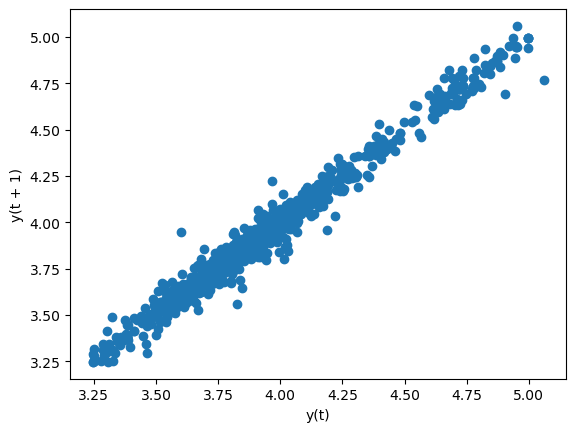

In [14]:
# Paso 13: Comprobar linealidad de la variable y = 'close'

lag_plot(telefonica.close)

In [15]:
# Paso 14: Importar modelo de AR

from statsmodels.tsa.ar_model import AutoReg as AR

In [16]:
# Paso 15: Realizar el split en el DF del train y el test

train, test = telefonica.close[:-10], telefonica.close[-10:]

train.shape, test.shape

((1143,), (10,))

In [17]:
# Paso 16: Entrenar el modelo de AR

modelo = AR(train, lags=1).fit()

In [18]:
# Paso 17: Realizar predicción con el entrenamiento

pred = modelo.predict(len(train), len(telefonica.close)-1)

# Check sobre los valores de la predicción

pred

2024-02-21    3.670048
2024-02-22    3.673063
2024-02-23    3.676047
2024-02-24    3.678999
2024-02-25    3.681921
2024-02-26    3.684811
2024-02-27    3.687671
2024-02-28    3.690501
2024-02-29    3.693301
2024-03-01    3.696072
Freq: D, dtype: float64

In [19]:
# Paso 18: Chequear coincidencia entre test y pred

test

date
2024-02-21    3.684
2024-02-22    3.743
2024-02-23    3.776
2024-02-24    3.776
2024-02-25    3.776
2024-02-26    3.776
2024-02-27    3.810
2024-02-28    3.828
2024-02-29    3.793
2024-03-01    3.822
Freq: D, Name: close, dtype: float64

In [20]:
# Paso 19: Calcular el error de la predicción sobre la realidad

error = (pred - test).abs().sum()/len(pred)  

error

0.09515650450394428

In [21]:
# Paso 20: Generar un DF sobre la comparativa en realidad, predicción y error

res=pd.DataFrame({'real': test, 'pred': pred, 'error': pred - test})

res

,real,pred,error
2024-02-21,3.684,3.670048,-0.013952
2024-02-22,3.743,3.673063,-0.069937
2024-02-23,3.776,3.676047,-0.099953
2024-02-24,3.776,3.678999,-0.097001
2024-02-25,3.776,3.681921,-0.094079
2024-02-26,3.776,3.684811,-0.091189
2024-02-27,3.810,3.687671,-0.122329
2024-02-28,3.828,3.690501,-0.137499
2024-02-29,3.793,3.693301,-0.099699
2024-03-01,3.822,3.696072,-0.125928
